# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from pprint import pprint
#regressions
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [35]:
cities[0:5]

['arraial do cabo', 'boa vista', 'umzimvubu', 'torbay', 'fort saint john']

In [36]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

In [37]:
# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(weather_response.status_code)

200


In [38]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 42.2506, 'lon': -75.833},
 'dt': 1646990604,
 'id': 5110365,
 'main': {'feels_like': 27.84,
          'humidity': 83,
          'pressure': 1016,
          'temp': 27.84,
          'temp_max': 32.36,
          'temp_min': 23.47},
 'name': 'Broome',
 'sys': {'country': 'US',
         'id': 2013651,
         'sunrise': 1646997733,
         'sunset': 1647039879,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 0}}


In [39]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [40]:
city = weather_json['name']
country = weather_json['sys']['country']
lat = weather_json['coord']['lat']
lng = weather_json['coord']['lon']

day_date = weather_json['dt']


humidity = weather_json['main']['humidity']
max_temp = weather_json['main']['temp_max']
wind_speed = weather_json['wind']['speed']
cloudiness = weather_json['clouds']['all']

In [41]:
lats = []
lngs = []
countries = []
clouds = []
dates = []
city_names = []
wind_speeds = []
max_temps = []
humids = []


for city in cities[0:607]:
    #Make Request
    print(city)
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(weather_response.status_code)
    print()
    
    
    if(weather_response.status_code) == 200:
        
    
        #parse the data
        city = weather_json['name']
        country = weather_json['sys']['country']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']

        day_date = weather_json['dt']


        humidity = weather_json['main']['humidity']
        max_temp = weather_json['main']['temp_max']
        wind_speed = weather_json['wind']['speed']
        cloudiness = weather_json['clouds']['all']

        #Place into list
        city_names.append(city)
        countries.append(country)
        lats.append(lat)
        lngs.append(lng)
        dates.append(day_date)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        max_temps.append(max_temp)
        humids.append(humidity)
        
        
        
    else:
        
        city_names.append(np.nan)
        countries.append(np.nan)
        lats.append(np.nan)
        lngs.append(np.nan)
        dates.append(np.nan)
        clouds.append(np.nan)
        wind_speeds.append(np.nan)
        max_temps.append(np.nan)
        humids.append(np.nan)

    
    time.sleep(60)

arraial do cabo
200

boa vista
200

umzimvubu
404

torbay
200

fort saint john
404

santa eulalia del rio
404

gornyy
200

chuy
200

puerto del rosario
200

arrecife
200

arlit
200

hilo
200

kodiak
200

katsuura
200

nikolskoye
200

cape town
200

general roca
200

mar del plata
200

punta arenas
200

celestun
200

santa cruz de la palma
200

attawapiskat
404

ushuaia
200

yellowknife
200

ponta do sol
200

mozarlandia
200

ust-shonosha
200

kapaa
200

qaanaaq
200

eirunepe
200

russell
200

labuhan
200

tual
200

udachnyy
200

lazaro cardenas
200

kangalassy
200

kathu
200

beyneu
200

mataura
200

verkhoyansk
200

hobart
200

georgetown
200

golynki
200

albany
200

port alfred
200

avera
200

bluff
200

sitka
200

san pedro
200

vaini
200

grants pass
200

victoria
200

illoqqortoormiut
404

new norfolk
200

hithadhoo
200

waipawa
200

belushya guba
404

cabo san lucas
200

ostrovnoy
200

tuatapere
200

kaitangata
200

bengkulu
200

butaritari
200

lompoc
200

chifeng
200

sinnamar

200

llandrindod wells
200

chagda
404

lere
200

vorukh
200

benjamin aceval
200

monster
200

haveri
200

viedma
200

toliary
404

mangrol
200

tiassale
200

avesta
200

nuevo progreso
200

portree
200

shahrud
200

tunduma
200

moroni
200

port macquarie
200

sistranda
200

clyde river
200

alim
200

balykshi
200

nishihara
200

cocachacra
200

thinadhoo
200

narsaq
200

minden
200

belyy yar
200

qingdao
200

porto novo
200

levski
200

hedaru
200

cross lanes
200

davila
200

gamba
200

tsihombe
404

el prat de llobregat
200

wagar
200

warwick
200

manuk mangkaw
200

guane
200

dakoro
200

asheville
200



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [83]:
df = pd.DataFrame()

df["City"] = city_names
df["Country"] = countries
df["Latitude"] = lats
df["Longitude"] = lngs
df["Date"] = dates
df["Wind_Speed"] = wind_speeds
df["Humidity"] = humids
df["Max_Temp"] = max_temps
df["Cloudiness"] = clouds

df

,City,Country,Latitude,Longitude,Date,Wind_Speed,Humidity,Max_Temp,Cloudiness
0,Arraial do Cabo,BR,-22.9661,-42.0278,1.646991e+09,19.57,88.0,75.06,0.0
1,Boa Vista,BR,2.8197,-60.6733,1.646990e+09,4.61,78.0,76.98,40.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Torbay,CA,47.6666,-52.7314,1.646991e+09,20.71,89.0,29.75,40.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
602,Warwick,US,41.7001,-71.4162,1.646991e+09,0.00,90.0,37.33,0.0
603,Manuk Mangkaw,PH,4.8000,119.8500,1.646991e+09,8.39,74.0,83.16,80.0
604,Guane,CU,22.2025,-84.0875,1.646991e+09,5.50,92.0,72.45,5.0
605,Dakoro,NE,14.5106,6.7650,1.646991e+09,15.52,13.0,87.96,100.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        562 non-null    object 
 1   Country     562 non-null    object 
 2   Latitude    562 non-null    float64
 3   Longitude   562 non-null    float64
 4   Date        562 non-null    float64
 5   Wind_Speed  562 non-null    float64
 6   Humidity    562 non-null    float64
 7   Max_Temp    562 non-null    float64
 8   Cloudiness  562 non-null    float64
dtypes: float64(7), object(2)
memory usage: 42.8+ KB


In [85]:
#Clean dataframe to remove cities that were not found or had missing data that coused our row to go nan
df['City'] = df['City'].replace('', np.nan)
df = df.dropna()



In [86]:
df.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Humidity,Max_Temp,Cloudiness
0,Arraial do Cabo,BR,-22.9661,-42.0278,1.646991e+09,19.57,88.0,75.06,0.0
1,Boa Vista,BR,2.8197,-60.6733,1.646990e+09,4.61,78.0,76.98,40.0
3,Torbay,CA,47.6666,-52.7314,1.646991e+09,20.71,89.0,29.75,40.0
6,Gornyy,RU,55.1153,83.9059,1.646991e+09,9.13,80.0,4.17,57.0
7,Chui,UY,-33.6971,-53.4616,1.646991e+09,7.34,73.0,58.10,69.0


In [87]:
#Save dataframe
df.to_csv("Output/CityWeatherData.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [88]:
df.Humidity.max()

100.0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

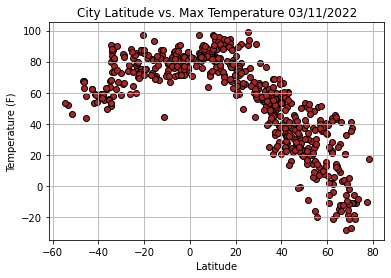

In [95]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], df["Max_Temp"], edgecolors="black",facecolors="firebrick")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

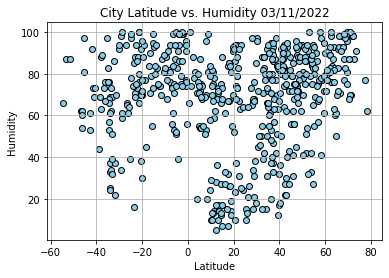

In [96]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], df["Humidity"], edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

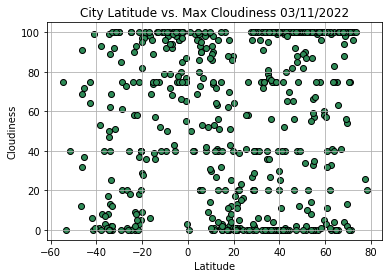

In [97]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], df["Cloudiness"], edgecolors="black",facecolors="seagreen")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

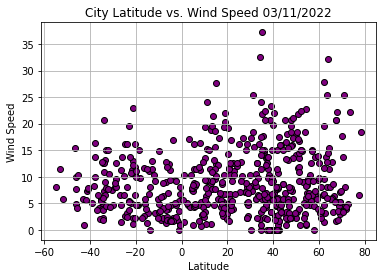

In [99]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], df["Wind_Speed"], edgecolors="black",facecolors="purple")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [100]:
#create a Northern Hemisphere dataframe
mask = df.Latitude >= 0
north = df.loc[mask]
north

,City,Country,Latitude,Longitude,Date,Wind_Speed,Humidity,Max_Temp,Cloudiness
1,Boa Vista,BR,2.8197,-60.6733,1.646990e+09,4.61,78.0,76.98,40.0
3,Torbay,CA,47.6666,-52.7314,1.646991e+09,20.71,89.0,29.75,40.0
6,Gornyy,RU,55.1153,83.9059,1.646991e+09,9.13,80.0,4.17,57.0
8,Puerto del Rosario,ES,28.5004,-13.8627,1.646991e+09,8.05,67.0,62.35,20.0
9,Arrecife,ES,28.9630,-13.5477,1.646991e+09,6.91,67.0,62.58,20.0
...,...,...,...,...,...,...,...,...,...
602,Warwick,US,41.7001,-71.4162,1.646991e+09,0.00,90.0,37.33,0.0
603,Manuk Mangkaw,PH,4.8000,119.8500,1.646991e+09,8.39,74.0,83.16,80.0
604,Guane,CU,22.2025,-84.0875,1.646991e+09,5.50,92.0,72.45,5.0
605,Dakoro,NE,14.5106,6.7650,1.646991e+09,15.52,13.0,87.96,100.0


In [101]:
#create a Southern Hemisphere dataframe
mask = df.Latitude < 0
south = df.loc[mask]
south

,City,Country,Latitude,Longitude,Date,Wind_Speed,Humidity,Max_Temp,Cloudiness
0,Arraial do Cabo,BR,-22.9661,-42.0278,1.646991e+09,19.57,88.0,75.06,0.0
7,Chui,UY,-33.6971,-53.4616,1.646991e+09,7.34,73.0,58.10,69.0
15,Cape Town,ZA,-33.9258,18.4232,1.646990e+09,4.61,33.0,90.12,0.0
16,General Roca,AR,-39.0333,-67.5833,1.646990e+09,5.10,44.0,59.27,1.0
17,Mar del Plata,AR,-38.0023,-57.5575,1.646991e+09,10.00,88.0,58.08,0.0
...,...,...,...,...,...,...,...,...,...
580,Moroni,KM,-11.7022,43.2551,1.646991e+09,9.22,70.0,87.80,40.0
581,Port Macquarie,AU,-31.4333,152.9167,1.646991e+09,4.32,70.0,66.88,100.0
587,Cocachacra,PE,-17.0883,-71.7575,1.646991e+09,2.19,84.0,71.29,100.0
595,Hedaru,TZ,-4.5000,37.9000,1.646991e+09,1.61,39.0,90.46,78.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

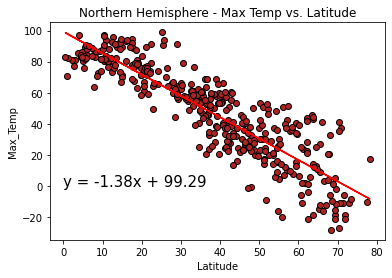

In [156]:
# Add the linear regression equation and line to plot
x_values_north = north['Latitude']
y_values_north = north['Max_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north,y_values_north, edgecolors="black",facecolors="firebrick")
plt.plot(x_values_north,regress_values,"r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.annotate(line_eq,(0,0),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
plt.savefig("Output/Northern Hemisphere Latitude vs. Max Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

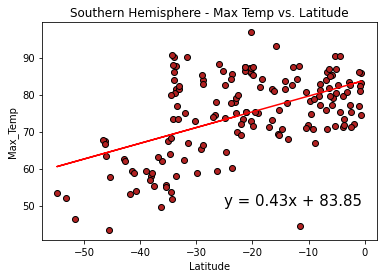

In [157]:
# Add the linear regression equation and line to plot
x_values_south = south['Latitude']
y_values_south = south['Max_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south, edgecolors="black",facecolors="firebrick")
plt.plot(x_values_south,regress_values,"r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.annotate(line_eq,(-25,50),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
plt.savefig("Output/Southern Hemisphere Latitude vs. Max Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

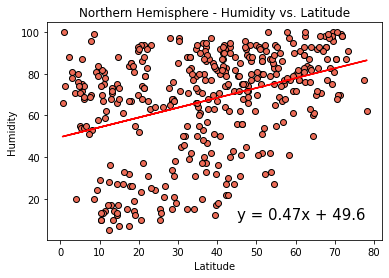

In [160]:
# Add the linear regression equation and line to plot
x_values_north = north['Latitude']
y_values_north = north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north,y_values_north, edgecolors="black", color="#EC6B56")
plt.plot(x_values_north,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.annotate(line_eq,(45,10),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Output/Northern Hemisphere Latitude vs. Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

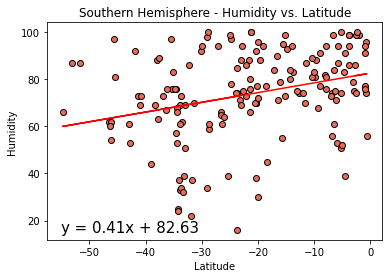

In [161]:
# Add the linear regression equation and line to plot
x_values_south = south['Latitude']
y_values_south = south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south, edgecolors="black", color="#EC6B56")
plt.plot(x_values_south,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.annotate(line_eq,(-55,15),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Output/Souththern Hemisphere Latitude vs. Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

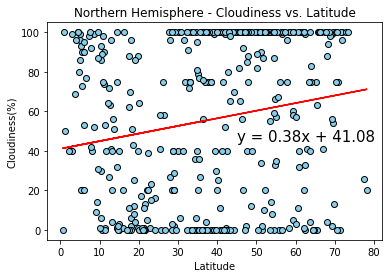

In [152]:
# Add the linear regression equation and line to plot
x_values_north = north['Latitude']
y_values_north = north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north,y_values_north, edgecolors="black",facecolors="skyblue")
plt.plot(x_values_north,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.annotate(line_eq,(45,45),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("Output/Northern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

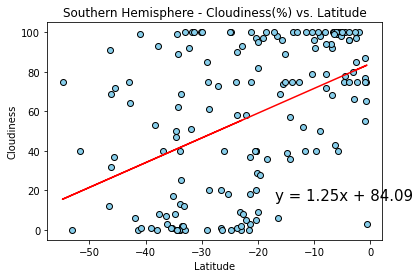

In [153]:
# Add the linear regression equation and line to plot
x_values_south = south['Latitude']
y_values_south = south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south, edgecolors="black",facecolors="skyblue")
plt.plot(x_values_south,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude')
plt.annotate(line_eq,(-17,15),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Output/Souththern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

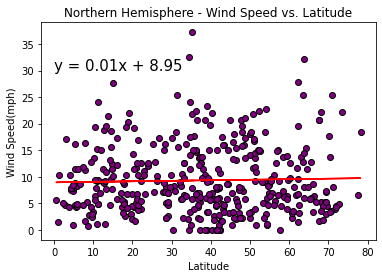

In [154]:
# Add the linear regression equation and line to plot
x_values_north = north['Latitude']
y_values_north = north['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north,y_values_north, edgecolors="black",facecolors="purple")
plt.plot(x_values_north,regress_values,"r-")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("Output/Northern Hemisphere Latitude vs. Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

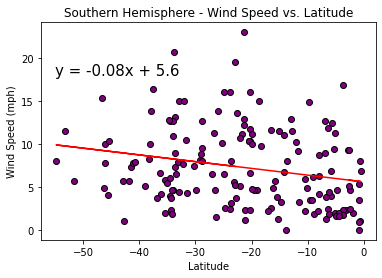

In [155]:
# Add the linear regression equation and line to plot
x_values_south = south['Latitude']
y_values_south = south['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south,y_values_south, edgecolors="black",facecolors="purple")
plt.plot(x_values_south,regress_values,"r-")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(line_eq,(-55,18),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Output/Souththern Hemisphere Latitude vs. Wind Speed.png")
plt.show()